## WallStreetBets - Reddit Sentiment Analysis

Sentiment Analysis of posts on r/wallstreetbets subreddit: Jan 2022 - Oct 2022


Data set sourced through a Twitter API scrape. Python code source: https://www.youtube.com/watch?v=ujId4ipkBio&t=171s

Sentiment analysis is form of text analytics that uses natural language processing (NLP) and machine learning. It is sometimes referred to as 'opinion mining'. A key aspect of sentiment analysis is polarity classification. Polarity refers to the overall sentiment conveyed by a particular tweet, phrase or word. Polarity can be expressed as a simple numerical score (or rating). In this example, the score is represented as 'below 0', 'zero', or 'above zero', with zero representing a neutral sentiment. 

In [ ]:
# pip install demoji

In [1]:
# import the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
# import demoji
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

### Create a data frame to store the data

In [2]:
# Load the data set into a data frame
wsb_df = pd.read_csv('wsb_comments.csv')
wsb_df.head(5)

Comment     author  \
0  \n**User Report**| | | |\n:--|:--|:--|:--\n**T...  VisualMod   
1  Soon TSLA owners will start wondering why they...     mpoozd   
2  Dec 1st, 2022: Apple quietly hires all the for...     1mikeg   
3  You can avoid the cut but just not taking paym...    Jenos00   
4           Lol. "Go to war." Apple doesn't give af.   Gsgunboy   

   comment_score  parent_id  time_created  
0              1  t3_z76bq4  1.669665e+09  
1          11085  t3_z76bq4  1.669666e+09  
2            450  t3_z76bq4  1.669679e+09  
3           7620  t3_z76bq4  1.669668e+09  
4           1350  t3_z76bq4  1.669675e+09

### Filter location of posts in the data frame by a call to its location

In [3]:
wsb_df.loc[:,"Comment"]

0        \n**User Report**| | | |\n:--|:--|:--|:--\n**T...
1        Soon TSLA owners will start wondering why they...
2        Dec 1st, 2022: Apple quietly hires all the for...
3        You can avoid the cut but just not taking paym...
4                 Lol. "Go to war." Apple doesn't give af.
                               ...                        
53884    Whoa, don't do that dude.  You might have some...
53885    Of course. I recommend doing a lot of research...
53886                         Dont worry i upvoted you bro
53887    Pretty sure you just apply. Say goodbye to you...
53888    I recommend you don’t do any research, the bes...
Name: Comment, Length: 53889, dtype: object

### Clean the data to remove unecessary characters, symbols, hyperlinks ...

In [5]:
# create a function to clean tweets in the data set
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+_\\*\"', '', text) # remove @mentions based on any character (raw string)
    text = re.sub(r'#', '', text) # remove the '#' symbol and replace with empty string
    text = re.sub('RT[\s]+', '', text)  # remove retweets (RT) followed by white space
    text = re.sub('https?:\/\/\S+', '', text) # remove URL hyperlinks followed by one or more white spaces
    return text
   
# apply the function and show the cleaned data 
wsb_df["Comment"] = wsb_df['Comment'].apply(cleanTxt)
wsb_df

Comment          author  \
0      \n**User Report**| | | |\n:--|:--|:--|:--\n**T...       VisualMod   
1      Soon TSLA owners will start wondering why they...          mpoozd   
2      Dec 1st, 2022: Apple quietly hires all the for...          1mikeg   
3      You can avoid the cut but just not taking paym...         Jenos00   
4               Lol. "Go to war." Apple doesn't give af.        Gsgunboy   
...                                                  ...             ...   
53884  Whoa, don't do that dude.  You might have some...        Punt_Man   
53885  Of course. I recommend doing a lot of research...        tfdude28   
53886                       Dont worry i upvoted you bro  MassageGymnist   
53887  Pretty sure you just apply. Say goodbye to you...             NaN   
53888  I recommend you don’t do any research, the bes...          rdblaw   

       comment_score   parent_id  time_created  
0                  1   t3_z76bq4  1.669665e+09  
1              11085   t3_z76bq4  1.669666e+09  
2                450   t3_z76bq4  1.669679e+09  
3               7620   t3_z76bq4  1.669668e+09  
4               1350   t3_z76bq4  1.669675e+09  
...              ...         ...           ...  
53884             10  t1_hpq2wf7  1.640300e+09  
53885              3  t1_hpq2wf7  1.640291e+09  
53886              4  t1_hpqmxlq  1.640310e+09  
53887              2  t1_hpqmxlq  1.640330e+09  
53888              7  t1_hpq3hdi  1.640301e+09  

[53889 rows x 5 columns]

### Create two separate functions to check the subjectivity and polarity of the text in a given reddit post. Subjectivity is our proxy for 'opinionated' text, while polarity is a simple measure of the positivity or negativty of the tweet. 

In [6]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

### Next, create two columns in the data frame to store the subjectivity and polarity data

In [8]:
wsb_df['Subjectivity'] = wsb_df["Comment"].apply(getSubjectivity)
wsb_df['Polarity'] = wsb_df["Comment"].apply(getPolarity)
wsb_df

Comment          author  \
0      \n**User Report**| | | |\n:--|:--|:--|:--\n**T...       VisualMod   
1      Soon TSLA owners will start wondering why they...          mpoozd   
2      Dec 1st, 2022: Apple quietly hires all the for...          1mikeg   
3      You can avoid the cut but just not taking paym...         Jenos00   
4               Lol. "Go to war." Apple doesn't give af.        Gsgunboy   
...                                                  ...             ...   
53884  Whoa, don't do that dude.  You might have some...        Punt_Man   
53885  Of course. I recommend doing a lot of research...        tfdude28   
53886                       Dont worry i upvoted you bro  MassageGymnist   
53887  Pretty sure you just apply. Say goodbye to you...             NaN   
53888  I recommend you don’t do any research, the bes...          rdblaw   

       comment_score   parent_id  time_created  Subjectivity  Polarity  
0                  1   t3_z76bq4  1.669665e+09      0.600000  0.333333  
1              11085   t3_z76bq4  1.669666e+09      0.500000  0.000000  
2                450   t3_z76bq4  1.669679e+09      0.233333  0.151190  
3               7620   t3_z76bq4  1.669668e+09      0.000000  0.000000  
4               1350   t3_z76bq4  1.669675e+09      0.700000  0.800000  
...              ...         ...           ...           ...       ...  
53884             10  t1_hpq2wf7  1.640300e+09      0.000000  0.000000  
53885              3  t1_hpq2wf7  1.640291e+09      0.520000 -0.390000  
53886              4  t1_hpqmxlq  1.640310e+09      0.000000  0.000000  
53887              2  t1_hpqmxlq  1.640330e+09      0.644444  0.400000  
53888              7  t1_hpq3hdi  1.640301e+09      0.300000  1.000000  

[53889 rows x 7 columns]

### Plot a wordcloud to see how well the sentiments are distributed. the cloud image will also provide a simple visualisation of  words and terms that are common across tweets

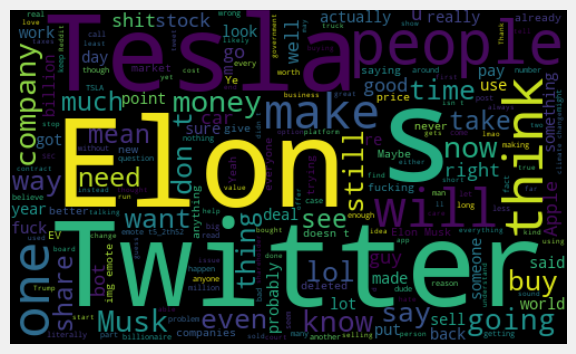

In [9]:
allWords = ' '.join(wsb_df['Comment'])
wordCloud = WordCloud(width=500, height=300, random_state = 30, max_font_size =119).generate(allWords)

plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Create a function to compute simple negative, neutral and positive scores for the sentiment analysis. Scores are based on a simple median of zero. String values ar retuned on the basis of the score value. Last, create a new column called 'Analysis'

In [10]:
# create function to compute negative, positive an neutral analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

# show the new dataframe
wsb_df['Analysis'] = wsb_df['Polarity'].apply(getAnalysis)
wsb_df

Comment          author  \
0      \n**User Report**| | | |\n:--|:--|:--|:--\n**T...       VisualMod   
1      Soon TSLA owners will start wondering why they...          mpoozd   
2      Dec 1st, 2022: Apple quietly hires all the for...          1mikeg   
3      You can avoid the cut but just not taking paym...         Jenos00   
4               Lol. "Go to war." Apple doesn't give af.        Gsgunboy   
...                                                  ...             ...   
53884  Whoa, don't do that dude.  You might have some...        Punt_Man   
53885  Of course. I recommend doing a lot of research...        tfdude28   
53886                       Dont worry i upvoted you bro  MassageGymnist   
53887  Pretty sure you just apply. Say goodbye to you...             NaN   
53888  I recommend you don’t do any research, the bes...          rdblaw   

       comment_score   parent_id  time_created  Subjectivity  Polarity  \
0                  1   t3_z76bq4  1.669665e+09      0.600000  0.333333   
1              11085   t3_z76bq4  1.669666e+09      0.500000  0.000000   
2                450   t3_z76bq4  1.669679e+09      0.233333  0.151190   
3               7620   t3_z76bq4  1.669668e+09      0.000000  0.000000   
4               1350   t3_z76bq4  1.669675e+09      0.700000  0.800000   
...              ...         ...           ...           ...       ...   
53884             10  t1_hpq2wf7  1.640300e+09      0.000000  0.000000   
53885              3  t1_hpq2wf7  1.640291e+09      0.520000 -0.390000   
53886              4  t1_hpqmxlq  1.640310e+09      0.000000  0.000000   
53887              2  t1_hpqmxlq  1.640330e+09      0.644444  0.400000   
53888              7  t1_hpq3hdi  1.640301e+09      0.300000  1.000000   

       Analysis  
0      Positive  
1       Neutral  
2      Positive  
3       Neutral  
4      Positive  
...         ...  
53884   Neutral  
53885  Negative  
53886   Neutral  
53887  Positive  
53888  Positive  

[53889 rows x 8 columns]

### Split the data frame to show only the relevant columns

In [11]:
dfNew = wsb_df[['Comment','Subjectivity','Polarity', 'Analysis']]
dfNew.head(10)

Comment  Subjectivity  Polarity  \
0  \n**User Report**| | | |\n:--|:--|:--|:--\n**T...      0.600000  0.333333   
1  Soon TSLA owners will start wondering why they...      0.500000  0.000000   
2  Dec 1st, 2022: Apple quietly hires all the for...      0.233333  0.151190   
3  You can avoid the cut but just not taking paym...      0.000000  0.000000   
4           Lol. "Go to war." Apple doesn't give af.      0.700000  0.800000   
5  Apple cash on hand for 2022 was $48.304B. Have...      0.200000  0.300000   
6  The first of the classic blunders, never get i...      0.233333  0.205556   
7               Rule 1: The house always gets a cut.      0.000000  0.000000   
8  Didn't Epic Games lose in court when they trie...      0.644444 -0.075000   
9  One company has a $2.29T market cap, the other...      0.387500  0.437500   

   Analysis  
0  Positive  
1   Neutral  
2  Positive  
3   Neutral  
4  Positive  
5  Positive  
6  Positive  
7   Neutral  
8  Negative  
9  Positive

### Sort and print all tweets marked 'positive'

In [12]:
# print all the positive tweets
j = 1
sortedDF = dfNew.sort_values(by=['Polarity'])

# for all rows in the data, sort tweets 
for i in range(0, sortedDF.shape[0]):
    if (sortedDF['Analysis'][i] == 'Positive'):
        print(j)
        print(sortedDF['Comment'][i])
        j = j+1

1

**User Report**| | | |
:--|:--|:--|:--
**Total Submissions**|0|**First Seen In WSB**|1 year ago
**Total Comments**|9|**Previous Best DD**|
**Account Age**|1 year|[^scan ^comment ]( ^submission ](
**Vote Spam**|[Click to Vote]( Approve**|[Click to Vote](

^^WSB ^^[Stats]( ^^[**Discord**]( ^^[BanBets](  ^^VoteBot ^^[FAQ]( ^^[Leaderboard]( ^^- ^^[**Keep_VM_Alive**](
2
Dec 1st, 2022: Apple quietly hires all the former Twitter employees.

Jan 30th, 2023: Apple announces "Apple Core" a social media site for posting and sharing all your thoughts, videos, photos, music and more! Available for both IOS, Android, and web.

Feb 1st, 2023: Apple de-lists Twitter from the app store.

Feb 9th, 2023: Google quietly turns back on G+, wonders why no one notices.
3
Lol. "Go to war." Apple doesn't give af.
4
Apple cash on hand for 2022 was $48.304B. Have fun fighting the war.
5
The first of the classic blunders, never get involved in a legal war with Apple
6
One company has a $2.29T market cap, the ot

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



### Sort and print all  tweets marked negative

In [13]:
j=1
sortedDF = dfNew.sort_values(by=['Polarity'], ascending=False)
sortedDF = sortedDF.reset_index(drop=True)

# # for all rows in the data, sort and print the negative tweets
for i in range(0, sortedDF.shape[0]):
    if (sortedDF['Analysis'][i] == 'Negative'):
        print(j)
        print(sortedDF['Comment'][i])
        j = j+1

1
Now we hodl and joint all the class action lawsuits and then he eventually buys it. Either that he keeps buying it up the old fashioned way and become an activist investor, they redo the company. Hell Fuck Damn, I might be a Twitter bull, maybe do my first calls on a stock out long. Seems like th8s will be in the courts for 3 years though.
2
It’s also wrong. They cannot issue worthless shares that’d be extremely illegal. What they would do is make an offer to each shareholder to BUY more shares. So they’re selling more shares at market prices to drive up the cost to purchase the entire company and ideally (from their perspective) keep it out of reach of Musk.

But no absolutely not do they dilute equity with it going to no one. That doesn’t even mechanically make sense.
3
Does he even buy shares like ever?  The options he gets, there are paper reported costs on the income statement but the ultimate true cost is dilution on existing shares.

If he tanks the price that lowers comp for 

## Create a scatter plot of sentiments by 'subjectivity' and 'polarity'

In [ ]:
# Plot the polarity and subjectvitiy
plt.figure(figsize=(8,6))
for i in range (0, dfNew.shape[0]):
    plt.scatter(dfNew['Polarity'][i], dfNew['Subjectivity'][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

There's a reasonable spread around the middle (neutral) position. As most of the data points lie to the right of the neutral position, does this suggest a more 'positive' sentiment toward Elon Musk tweets over the timeframe? 

### Check the percentage of positive, neutral and negative tweets in the data set

In [ ]:
# Get the percentage of positive tweets in the data set
pposts = dfNew[dfNew.Analysis == 'Positive']
pposts = pposts['Comment']
p = round( (pposts.shape[0] / dfNew.shape[0]) *100, 1)
print("{}% positive sentiment".format(p))

In [ ]:
# Get the percentage of negative tweets in the data set
nposts = dfNew[dfNew.Analysis == 'Negative']
nposts = nposts['Comment']
n = round( (nposts.shape[0] / dfNew.shape[0]) *100, 1)
print("{}% negative sentiment".format(n))

In [ ]:
# Get the percentage of neutral tweets in the data set
zposts = zposts[dfNew.Analysis == 'Neutral']
zposts = zposts['Text']
z = round( (zposts.shape[0] / dfNew.shape[0]) *100, 1)
print("{}% neutral sentiment".format(z))

### Create a bar chart of tweet sentiments 

In [ ]:
# show the value counts
dfNew['Analysis'].value_counts()

# plot and visualise the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
dfNew['Analysis'].value_counts().plot(kind='bar')
plt.show()